# Economic Data Analysis with Fred & Pandas

![FredEcoImg](https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/images/education/large-thumbs/fred.png)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.io as pio
import plotly.express as px

pio.renderers.default = 'iframe'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

API_KEY = os.environ["FRED_API"] 

# 1. Create The Fred Object

In [3]:
fred = Fred(api_key = API_KEY)

# 2. Search for Economic Data!

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-10-05,2023-10-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-10-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-05 08:34:09-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-10-05,2023-10-05,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-10-05,2023-10-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-10-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-05 08:33:05-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-10-05,2023-10-05,S&P 500,2013-10-07,2023-10-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-10-05 19:11:00-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-10-05,2023-10-05,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


# 3. Pull Raw Data & Plot

<Axes: title={'center': 'S&P 500'}>

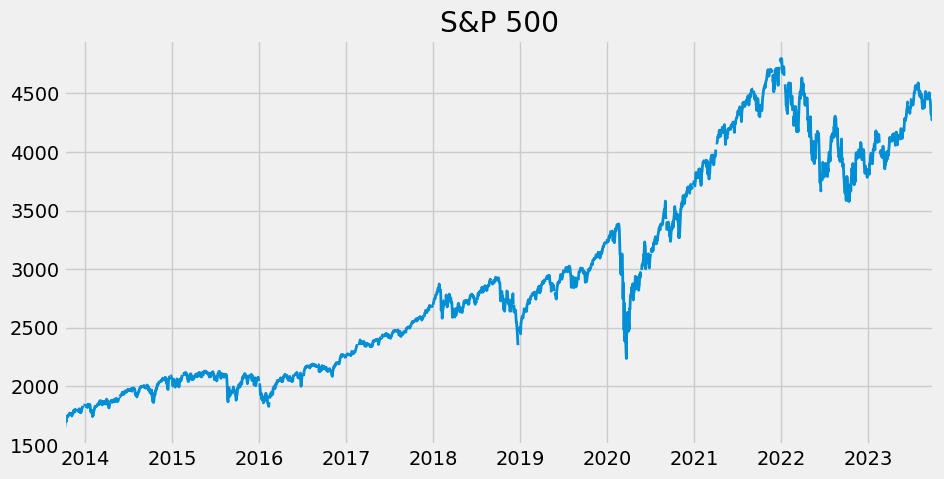

In [6]:
sp500 = fred.get_series('SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [7]:
unemp_df = fred.search("unemployment rate in", filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [8]:
all_results = []

for myid in unemp_df.index[:4]:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

unemp_results = pd.concat(all_results, axis=1)
unemp_results = unemp_results.dropna()

In [9]:
px.line(data_frame=unemp_results)